# Computer simulation practical assignment 2
## Hirbod Behnam 99171333

<div dir="rtl" style="font-size:18px; font-family:B Yekan;">
    از آنجایی که من از ژوپیتر برای نوشتن این گزارش استفاده می‌کنم صرفا ورودی‌ها را در کد بلاک‌ها هاردکد می‌کنم. اما با این حال کد خواندن از ورودی را نیز در ادامه قرار می‌دهم.
</div>

In [2]:
import numpy as np

In [ ]:
n = int(input())
p = np.fromstring(input(), dtype=np.float64, sep=' ')
transition = np.array([list(map(lambda x: float(x), input().split())) for _ in range(n)], dtype=np.float64)

<div dir="rtl" style="font-size:18px; font-family:B Yekan;">
    حال کد را می‌نویسیم. در ابتدا تصمیم می‌گیریم که به چه مقدار می‌خواهیم که بر روی
    markov chain
    حرکت کنیم. برای این کار من توان دو تعداد حالات را نظر گرفتم چرا که به اندازه‌ی کافی بزرگ است.
</div>

In [3]:
n = 3
p = np.array([0, 0, 1], dtype=np.float64)
transition = np.array([[0.3, 0.2, 0.5], [0.4, 0.3, 0.3], [0.3, 0.4, 0.3]], dtype=np.float64)
move_count = n ** 2

<div dir="rtl" style="font-size:18px; font-family:B Yekan;">
    حال به تعداد بار زیادی عملیات شبیه سازی را انجام می‌دهیم و ذخیره می‌کنیم که هر حالت را چند بار دیده‌ایم.  در ابتدا به صورت رندوم با توجه به وزن احتمال شروع از هر حالت یکی از حالات را به عنوان نقطه شروع انتخاب می‌کنیم. سپس با توجه به هر ردیف ماتریس
    transition
    به یک حالت دیگر می‌رویم.
    برای انتخاب تعداد کل عملیات شبیه سازی نیز من عملا با توجه به سایز ماتریس عمل کردم و یک عدد بزرگ
    (در اینجام هزار)
    را در ابعاد ماتریس
    transition
    ضرب کردم.
    می‌توان تعداد خانه‌های ماتریس را نیز در عدد مورد نظر ضرب کرد
    (منظور در اینجا ۹ است).
    با این کار دقت بالاتر می‌رود.
</div>

In [17]:
ITERATIONS = 1000 * n
seen_states = np.zeros(n, dtype=np.int64)
for _ in range(ITERATIONS):
    current_state = np.random.choice(n, p = p)
    for _ in range(move_count):
        current_state = np.random.choice(n, p = transition[current_state])
    seen_states[current_state] += 1
seen_states.astype(dtype=np.float64) / ITERATIONS

array([0.33166667, 0.286     , 0.38233333])

<div dir="rtl" style="font-size:18px; font-family:B Yekan;">
    حال در این قسمت تاثیر مقدار iterations و move count را بر روی جواب حساب می‌کنیم.
</div>

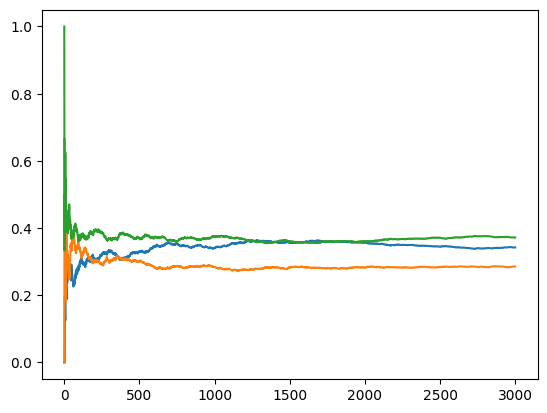

In [18]:
import matplotlib.pyplot as plt

# Simulate
seen_states = np.zeros(n, dtype=np.int64)
iterations_states = []
for iteration in range(ITERATIONS):
    current_state = np.random.choice(n, p = p)
    for _ in range(move_count):
        current_state = np.random.choice(n, p = transition[current_state])
    seen_states[current_state] += 1
    iterations_states.append(list(seen_states.astype(dtype=np.float64) / (iteration + 1)))

iterations_states = np.array(iterations_states, dtype=np.float64)
fig, ax = plt.subplots()
ax.plot(np.arange(ITERATIONS), iterations_states[:,0])
ax.plot(np.arange(ITERATIONS), iterations_states[:,1])
ax.plot(np.arange(ITERATIONS), iterations_states[:,2])
plt.show()

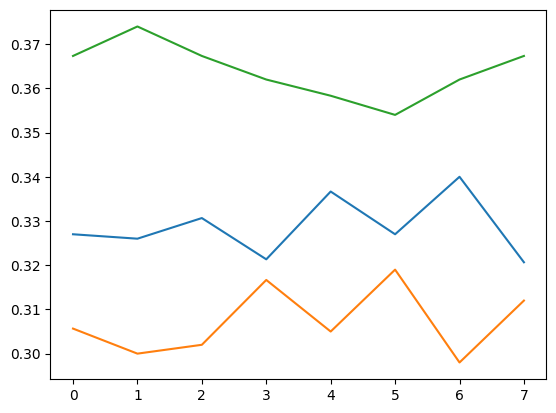

In [21]:
import matplotlib.pyplot as plt

# Simulate
iterations_states = []
for moves in range(1, move_count):
    seen_states = np.zeros(n, dtype=np.int64)
    for iteration in range(ITERATIONS):
        current_state = np.random.choice(n, p = p)
        for _ in range(move_count):
            current_state = np.random.choice(n, p = transition[current_state])
        seen_states[current_state] += 1
    iterations_states.append(list(seen_states.astype(dtype=np.float64) / ITERATIONS))

iterations_states = np.array(iterations_states, dtype=np.float64)
fig, ax = plt.subplots()
ax.plot(np.arange(len(iterations_states)), iterations_states[:,0])
ax.plot(np.arange(len(iterations_states)), iterations_states[:,1])
ax.plot(np.arange(len(iterations_states)), iterations_states[:,2])
plt.show()